<a href="https://colab.research.google.com/github/SmartPracticeschool/SBSPS-Challenge-1322-Predicting-the-energy-output-of-wind-turbine-based-on-weather-condition/blob/master/Wind_power_generation_forecast_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [6]:
from google.colab import files
uploaded = files.upload()

Saving T1_updated new.csv to T1_updated new.csv


In [8]:
dataset = pd.read_csv("T1_updated new.csv", encoding= 'unicode_escape')
TRAIN_SPLIT = 50530

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
print (dataset)

              Date/Time  LV ActivePower (kW)  ...  Unnamed: 6  Unnamed: 7
0      01 01 2018 00:00           380.047790  ...         NaN         NaN
1      01 01 2018 00:10           453.769196  ...         NaN         NaN
2      01 01 2018 00:20           306.376587  ...         NaN         NaN
3      01 01 2018 00:30           419.645904  ...         NaN         NaN
4      01 01 2018 00:40           380.650696  ...         NaN         NaN
...                 ...                  ...  ...         ...         ...
86608              2017          4249.000000  ...         NaN       4.249
86609              2017          4008.000000  ...         NaN       4.008
86610              2017          3895.000000  ...         NaN       3.895
86611              2017          3987.000000  ...         NaN       3.987
86612              2017          3616.000000  ...         NaN       3.616

[86613 rows x 8 columns]


In [10]:
# dataset.drop(columns = ["Theoretical_Power_Curve (KWh)"])

In [11]:
df = dataset
features_considered = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']
features = df[features_considered]
features.index = df['Date/Time']
features.head()

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
Date/Time,,,
01 01 2018 00:00,380.047790,5.311336,259.994904
01 01 2018 00:10,453.769196,5.672167,268.641113
01 01 2018 00:20,306.376587,5.216037,272.564789
01 01 2018 00:30,419.645904,5.659674,271.258087
01 01 2018 00:40,380.650696,5.577941,265.674286


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7e50299e8>,
      dtype=object)

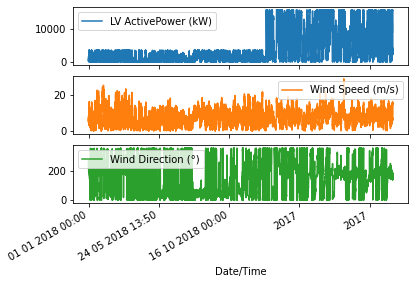

In [12]:
features.plot(subplots=True)

In [13]:

dataset = features.values
print(dataset)

# print("sliced", dataset[:, 0])
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

[[ 380.0477905     5.31133604  259.9949036 ]
 [ 453.7691956     5.67216682  268.6411133 ]
 [ 306.3765869     5.2160368   272.5647888 ]
 ...
 [3895.            7.037       154.335     ]
 [3987.            7.089       157.652     ]
 [3616.            6.881       161.498     ]]


In [14]:
dataset = (dataset-data_mean)/data_std

In [31]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [16]:
# past_history = 720
# future_target = 72
# STEP = 6
# BUFFER_SIZE = 10000
# BATCH_SIZE = 256
# x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 0], 0,
#                                                    TRAIN_SPLIT, past_history,
#                                                    future_target, STEP,
#                                                    single_step=True)

In [17]:
# train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
# train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [18]:
# def multivariate_data(dataset, target, start_index, end_index, history_size,
#                       target_size, step, single_step=False):
#   data = []
#   labels = []

#   start_index = start_index + history_size
#   if end_index is None:
#     end_index = len(dataset) - target_size

#   for i in range(start_index, end_index):
#     indices = range(i-history_size, i, step)
#     data.append(dataset[indices])

#     if i+target_size<50531:
#       if single_step:
#         labels.append(target[i+target_size])
#       else:
#         labels.append(target[i:i+target_size])
#   for i in range(1000000):
#     if len(data)>49739:
#       data.pop(-1)

#   print(len(labels), len(data))
#   return np.array(data), np.array(labels)

In [32]:
past_history = 720
future_target = 72
STEP = 6
BUFFER_SIZE = 10000
BATCH_SIZE = 256
# dataset = np.asarray(dataset).astype(np.float32)
# print(dataset[:, 0].dtype)
# print("sliced", dataset[:, 0].dtype)
# print(len(dataset))
# print(dataset.dtype)
# print(dataset)
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 0], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
# x_train_multi = np.asarray(x_train_multi).astype(np.float32)
# y_train_multi = np.asarray(y_train_multi).astype(np.float64)
# print(y_train_multi.dtype)
# print(x_train_multi.shape)
# print(y_train_multi.shape)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 0],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)
# x_val_multi = np.asarray(x_val_multi).astype(np.float32)
# y_val_multi = np.asarray(y_val_multi).astype(np.float32)
# print(x_val_multi.dtype)
# print(y_val_multi.dtype)


In [33]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target power to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target power to predict : (72,)


In [34]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [35]:
def create_time_steps(length):
  return list(range(-length, 0))

In [36]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

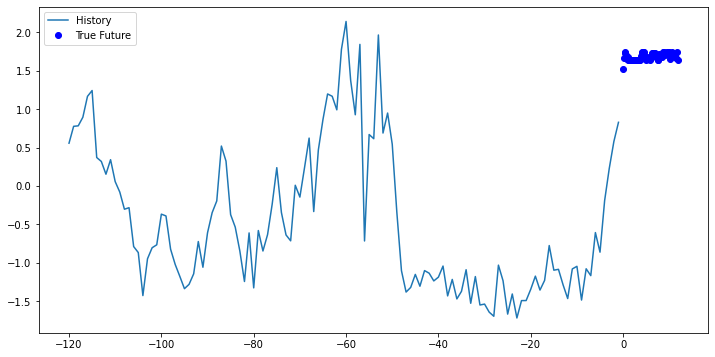

In [37]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [38]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [39]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(256, 72)


In [41]:
EVALUATION_INTERVAL = 200
EPOCHS = 10
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 34s 172ms/step - loss: 254.2867 - val_loss: 4.8582
Epoch 2/10
200/200 [==============================] - 34s 168ms/step - loss: 0.5560 - val_loss: 4.1140
Epoch 3/10
200/200 [==============================] - 33s 165ms/step - loss: 0.5192 - val_loss: 3.7243
Epoch 4/10
200/200 [==============================] - 33s 164ms/step - loss: 0.5090 - val_loss: 3.7566
Epoch 5/10
200/200 [==============================] - 33s 163ms/step - loss: 0.5004 - val_loss: 3.7212
Epoch 6/10
200/200 [==============================] - 32s 162ms/step - loss: 0.4989 - val_loss: 3.8177
Epoch 7/10
200/200 [==============================] - 34s 169ms/step - loss: 145.3651 - val_loss: 3.8647
Epoch 8/10
200/200 [==============================] - 32s 162ms/step - loss: 0.4827 - val_loss: 3.8044
Epoch 9/10
200/200 [==============================] - 32s 161ms/step - loss: 0.4662 - val_loss: 3.8758
Epoch 10/10
200/200 [==============================] - 32s 162ms/step

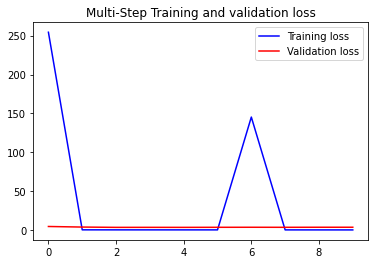

In [44]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

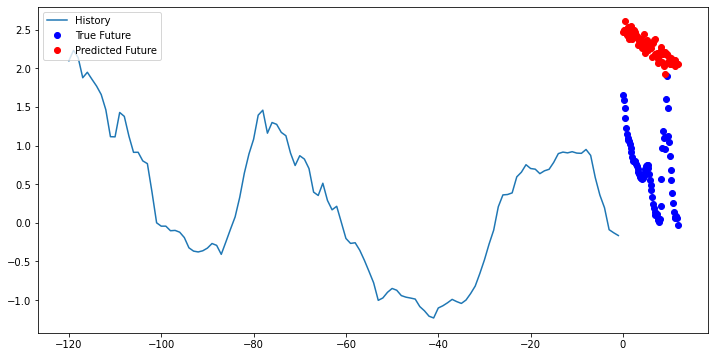

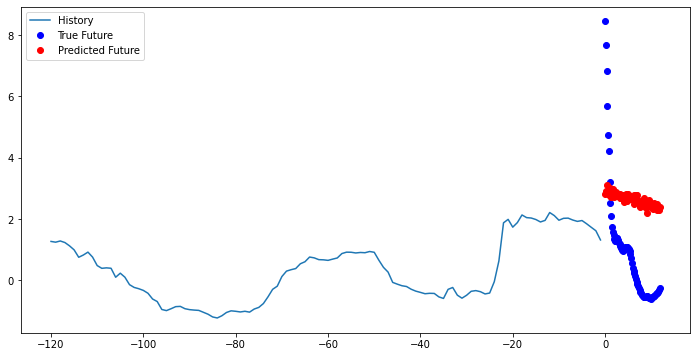

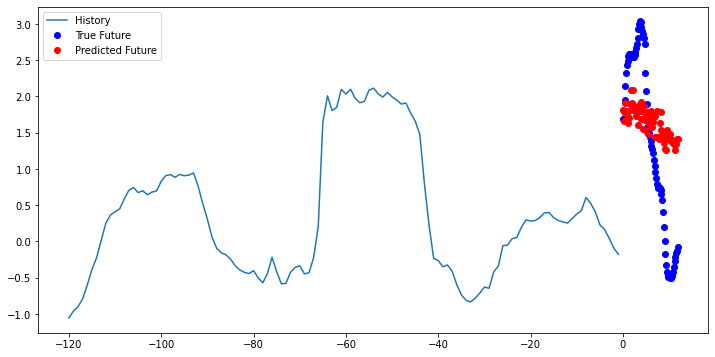

In [45]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])